<img src="logo_UTN.svg" align="right" width="150" /> 

## Teoría de Circuitos II

### Tarea Semanal 1

#### Por Matías Marfisi


#### Puntos 1 y 2

![Parte 1 desarrollo](1.jpg "Parte 1 desarrollo")

![Parte 2 desarrollo](2.jpg "Parte 2 desarrollo")

#### Punto 3

In [1]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)


#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import analyze_sys, pretty_print_bicuad_omegayq

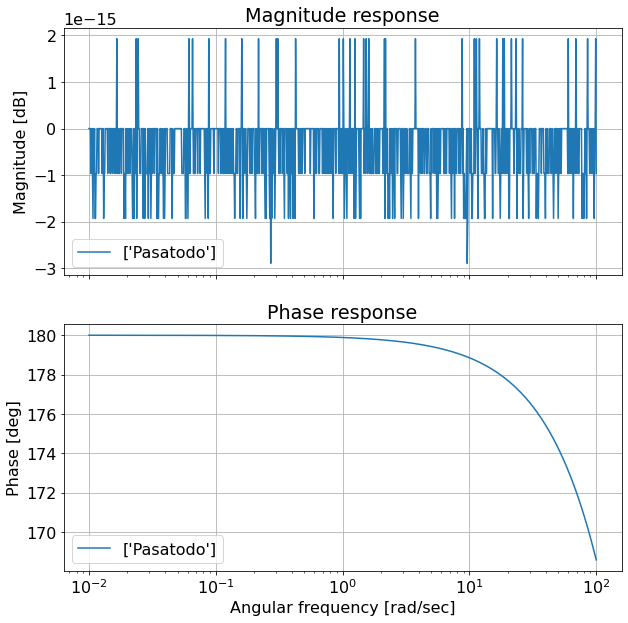

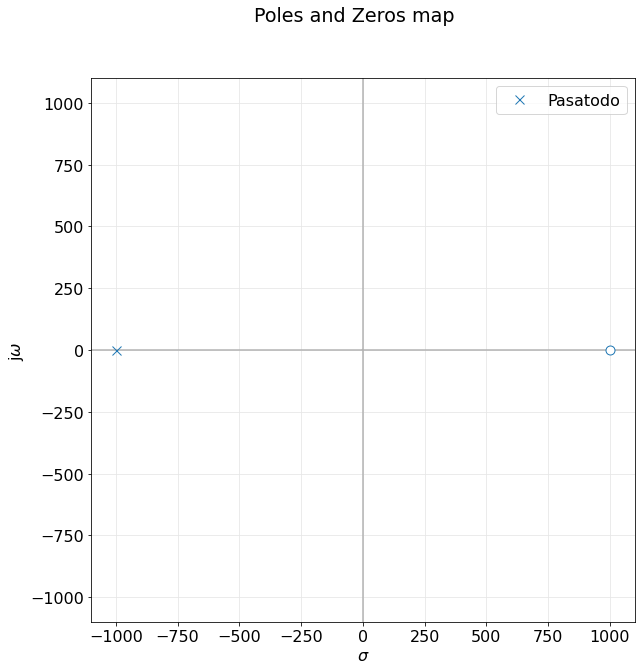

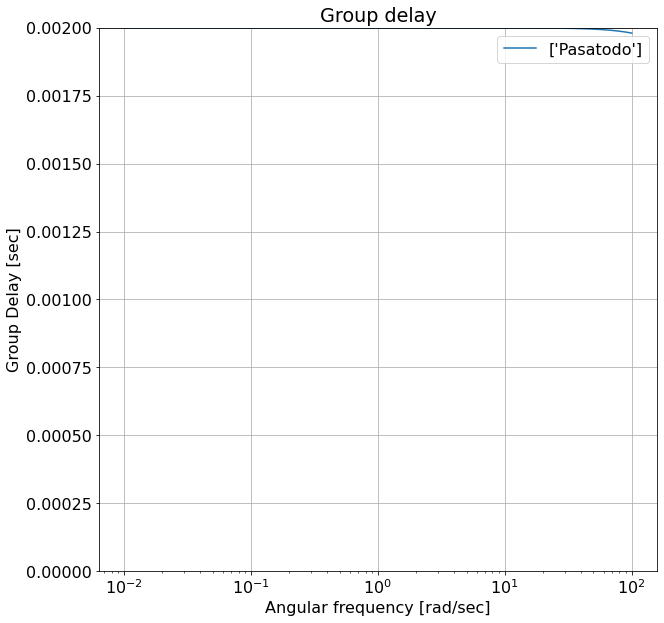

In [5]:
# Comienzo Ejercicio
R1 = 1e3 
R2 = 1e3
R3 = 1e3
C = 1e-6

num = np.array([1, -R2/(C*R3*R1)])
den = np.array([1, 1/(C*R3)])

sistema = sig.TransferFunction(num,den)


#    pretty_print_bicuad_omegayq(num,den)

#   mi_sos = sig.TransferFunction(num,den)

#  all_sos += [mi_sos]
plt.close('all')
analyze_sys(sistema, 'Pasatodo')



#### Punto 4

![Circuito Spice](Circuito.png "Circuito Spice")

##### Ploteamos en orden: Módulo, fase y retardo de grupo

![Simulaciones](Simulaciones.png "Simulaciones")

#### Punto 5

##### Este filtro pasa-todo puede utilizarse para correción de retardos entre señales, por ejemplo en un sistema de comunicaciones donde debemos asegurar que las señales lleguen en fase, es decir, para el alineamiento de señales temporales.

#### Simulación Simbólica con SymPy

In [8]:
# Planteo sistema de ecuaciones

import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

Vi, Vo, Vx = sp.symbols("Vi, Vo, Vx")

G1, G2, Y1, Y2, R, C = sp.symbols("1/R1, 1/R2, Y1, Y2, R3, C")
eqs = sp.solve([ Vx*(Y1+Y2)-Vi*Y1, Vx*(G1+G2) -Vi*G1 -Vo*G2], 
               [Vi, Vo])

transf_func = eqs[Vo]/eqs[Vi]

In [9]:
# Punto 1
expresion = transf_func.subs(Y1, s*C)
expresion = expresion.subs(Y2, 1/R)

num, den = sp.fraction(sp.simplify(sp.expand(expresion)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

den_coeffs = den.all_coeffs()
wo = den_coeffs[-1]

expresion_final = sp.Mul(k,num/den, evaluate=False)

display(expresion_final)
display(Math( r' \omega_o = ' + sp.latex(wo) ))

1*((-1/R1/(1/R2*C*R3) + s)/(s + 1/(C*R3)))

<IPython.core.display.Math object>

In [11]:
# Punto 2

# Normalizacion: w0 = 1 -> 1/CR3 = 1 -> 1/R3 = C

expresion = transf_func.subs(Y1, s*C)
expresion = expresion.subs(Y2, C) # Reemplazo G3 por C

num, den = sp.fraction(sp.simplify(sp.expand(expresion)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

den_coeffs = den.all_coeffs()
wo = den_coeffs[-1]

expresion_final = sp.Mul(k,num/den, evaluate=False)

display(sp.nsimplify(expresion_final))
display(Math( r' \omega_o = ' + sp.latex(wo) ))# Punto 2

1*((-1/R1/1/R2 + s)/(s + 1))

<IPython.core.display.Math object>

#### Red normalizada

![Normalizacion](Normalizacion.jpg "Normalizacion")